In [72]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [73]:
df=pd.read_csv("C:/Users/Admin/Downloads/archive/Bigbazaar_sales_data.csv")
df

,Item_Identifier,Item_Weight,Item_Visibility,Year,Outlet_Identifier,Item_Type,Item_MRP,MRP_Level,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Converted Sales
0,FDA15,9.30,0.016047,17,OUT049,Dairy,249.8092,Very_High,2,Tier 1,Supermarket Type1,3735.138000,2.428
1,DRC01,5.92,0.019278,7,OUT018,Soft Drinks,48.2692,Low,2,Tier 3,Supermarket Type2,443.422800,0.288
2,FDN15,17.50,0.016760,17,OUT049,Meat,141.6180,High,2,Tier 1,Supermarket Type1,2097.270000,1.363
3,FDX07,19.20,0.022930,18,OUT010,Fruits and Vegetables,182.0950,High,2,Tier 3,Grocery Store,732.380000,0.476
4,NCD19,8.93,0.014670,29,OUT013,Household,53.8614,Low,1,Tier 3,Supermarket Type1,994.705200,0.647
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.013496,19,OUT046,Snack Foods,141.3154,High,3,Tier 1,Supermarket Type1,2308.372585,1.500
14200,FDD47,7.60,0.142991,7,OUT018,Starchy Foods,169.1448,High,2,Tier 3,Supermarket Type2,2442.394325,1.588
14201,NCO17,10.00,0.073529,14,OUT045,Health and Hygiene,118.7440,Medium,2,Tier 2,Supermarket Type1,1809.869722,1.176
14202,FDJ26,15.30,0.098200,9,OUT017,Canned,214.6218,Very_High,2,Tier 2,Supermarket Type1,3538.210920,2.300


In [74]:
df=df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Type','Item_Type'],axis=1)


In [75]:
X

,Item_Weight,Item_Visibility,Year,Item_MRP,MRP_Level,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
0,9.30,0.016047,17,249.8092,3,2,0,3735.138000
1,5.92,0.019278,7,48.2692,1,2,2,443.422800
2,17.50,0.016760,17,141.6180,0,2,0,2097.270000
3,19.20,0.022930,18,182.0950,0,2,2,732.380000
4,8.93,0.014670,29,53.8614,1,1,2,994.705200
...,...,...,...,...,...,...,...,...
14199,10.50,0.013496,19,141.3154,0,3,0,2308.372585
14200,7.60,0.142991,7,169.1448,0,2,2,2442.394325
14201,10.00,0.073529,14,118.7440,2,2,1,1809.869722
14202,15.30,0.098200,9,214.6218,3,2,1,3538.210920


In [76]:
y

0        2.428
1        0.288
2        1.363
3        0.476
4        0.647
         ...  
14199    1.500
14200    1.588
14201    1.176
14202    2.300
14203    0.824
Name: Converted Sales, Length: 14204, dtype: float64

In [77]:
le=LabelEncoder()
df['MRP_Level']=le.fit_transform(df['MRP_Level'])
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])
df

,Item_Weight,Item_Visibility,Year,Item_MRP,MRP_Level,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Converted Sales
0,9.30,0.016047,17,249.8092,3,2,0,3735.138000,2.428
1,5.92,0.019278,7,48.2692,1,2,2,443.422800,0.288
2,17.50,0.016760,17,141.6180,0,2,0,2097.270000,1.363
3,19.20,0.022930,18,182.0950,0,2,2,732.380000,0.476
4,8.93,0.014670,29,53.8614,1,1,2,994.705200,0.647
...,...,...,...,...,...,...,...,...,...
14199,10.50,0.013496,19,141.3154,0,3,0,2308.372585,1.500
14200,7.60,0.142991,7,169.1448,0,2,2,2442.394325,1.588
14201,10.00,0.073529,14,118.7440,2,2,1,1809.869722,1.176
14202,15.30,0.098200,9,214.6218,3,2,1,3538.210920,2.300


In [78]:
X = df.drop(['Converted Sales'],axis=1)
y = df['Converted Sales']

In [79]:
X

,Item_Weight,Item_Visibility,Year,Item_MRP,MRP_Level,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
0,9.30,0.016047,17,249.8092,3,2,0,3735.138000
1,5.92,0.019278,7,48.2692,1,2,2,443.422800
2,17.50,0.016760,17,141.6180,0,2,0,2097.270000
3,19.20,0.022930,18,182.0950,0,2,2,732.380000
4,8.93,0.014670,29,53.8614,1,1,2,994.705200
...,...,...,...,...,...,...,...,...
14199,10.50,0.013496,19,141.3154,0,3,0,2308.372585
14200,7.60,0.142991,7,169.1448,0,2,2,2442.394325
14201,10.00,0.073529,14,118.7440,2,2,1,1809.869722
14202,15.30,0.098200,9,214.6218,3,2,1,3538.210920


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [81]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Predicted values for Converted Sales:")
print(y_pred)

Predicted values for Converted Sales:
[ 2.14184571  0.76860097  2.10593089 ... -0.59356129  1.53459756
  0.86402736]


In [82]:
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)


R-squared (R2): 0.9999999127200271


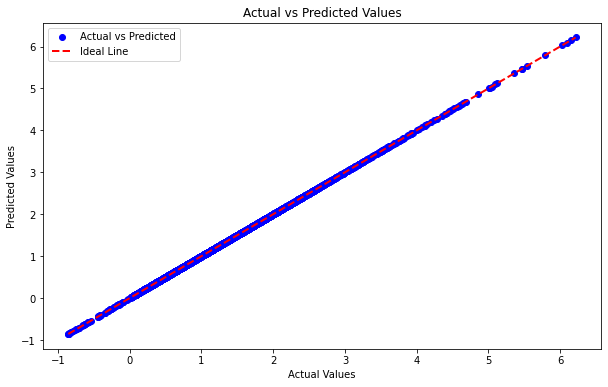

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
